In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
allergy_df=pd.read_csv('data/food-allergy-analysis-Zenodo.csv')

In [ ]:
allergy_df.describe()

In [ ]:
allergy_df.describe().drop('count')['AGE_START_YEARS'].plot(marker='o')
plt.ylabel('AGE_START_YEARS')

In [14]:
allergy_df.describe().drop('count')['AGE_START_YEARS']

mean     3.942140
std      4.646174
min     -4.312115
25%      0.021903
50%      1.763176
75%      7.208761
max     17.984942
Name: AGE_START_YEARS, dtype: float64

In [ ]:
df=allergy_df[allergy_df['AGE_START_YEARS']<0]
df.head()

In [ ]:
allergy_df.dtypes

In [ ]:
allergy_df.columns


In [ ]:
pd.concat([allergy_df.groupby('GENDER_FACTOR').count(),
          allergy_df.groupby('ETHNICITY_FACTOR').count(),
          allergy_df.groupby('RACE_FACTOR').count()])['SUBJECT_ID'].plot(kind="bar")

In [ ]:
(allergy_df.groupby(['GENDER_FACTOR','ETHNICITY_FACTOR']).count()['RACE_FACTOR']).plot(kind="bar")

In [ ]:
(allergy_df.groupby(['GENDER_FACTOR','RACE_FACTOR']).count()['ETHNICITY_FACTOR']).plot(kind="bar",color=['blue','blue','blue','blue','blue',
                                                                                                         'red','red','red','red','red','red'])

In [ ]:
shellfish_df=allergy_df[['SUBJECT_ID', 'BIRTH_YEAR', 'GENDER_FACTOR', 'RACE_FACTOR',
       'ETHNICITY_FACTOR', 'PAYER_FACTOR', 'ATOPIC_MARCH_COHORT',
       'AGE_START_YEARS', 'AGE_END_YEARS', 'SHELLFISH_ALG_START',
       'SHELLFISH_ALG_END']].copy()
shellfish_df.count()

In [ ]:
def clean_DataFrame(allergen):
    allergen_start_column=allergen.upper()+'_ALG_START'
    allergen_end_column=allergen.upper()+'_ALG_END'
    
    allergen_df=allergy_df[['SUBJECT_ID', 'BIRTH_YEAR', 'GENDER_FACTOR', 'RACE_FACTOR',
       'ETHNICITY_FACTOR', 'PAYER_FACTOR', 'ATOPIC_MARCH_COHORT',
       'AGE_START_YEARS', 'AGE_END_YEARS', allergen_start_column,
       allergen_end_column]].copy()

    allergen_df_clean=allergen_df[(allergen_df[allergen_start_column].isna()==False)]
    allergen_df_clean.reset_index(inplace=True,drop=True)
    value= allergen_df_clean[allergen_df_clean[allergen_end_column].isna()][allergen_start_column]

    #for index in value.index:
        #allergen_df_clean.iloc[index,10]=value[index]
    return allergen_df_clean


In [ ]:
shellfish_df_clean=clean_DataFrame('shellfish')
shellfish_df_clean.head()

In [ ]:
fish_df_clean=clean_DataFrame('fish')
fish_df_clean.count()

In [ ]:
df=shellfish_df_clean.groupby('GENDER_FACTOR')
shellfish_df_clean.plot(kind="scatter", x="AGE_START_YEARS", y="SHELLFISH_ALG_START", grid=True)

In [ ]:
shellfish_df_clean[shellfish_df_clean['AGE_START_YEARS']<1]["SHELLFISH_ALG_START"].count()

In [ ]:
shellfish_df_clean[shellfish_df_clean['BIRTH_YEAR']<2000].count(),shellfish_df_clean[shellfish_df_clean['BIRTH_YEAR']>=2000].count()

In [ ]:
shellfish_df_clean['AGE_START_YEARS'].describe()

In [ ]:
#shellfish_df_clean=shellfish_df[(shellfish_df['SHELLFISH_ALG_START'].isna()==False)]
#shellfish_df_clean.reset_index(inplace=True,drop=True)


In [ ]:
#value= shellfish_df_clean[shellfish_df_clean['SHELLFISH_ALG_END'].isna()]['SHELLFISH_ALG_START']

#for index in value.index:
 #   shellfish_df_clean.iloc[index,10]=value[index]


In [ ]:
shellfish_df_clean['GENDER_FACTOR'].unique()

In [6]:
allergy_df.columns

Index(['SUBJECT_ID', 'BIRTH_YEAR', 'GENDER_FACTOR', 'RACE_FACTOR',
       'ETHNICITY_FACTOR', 'PAYER_FACTOR', 'ATOPIC_MARCH_COHORT',
       'AGE_START_YEARS', 'AGE_END_YEARS', 'SHELLFISH_ALG_START',
       'SHELLFISH_ALG_END', 'FISH_ALG_START', 'FISH_ALG_END', 'MILK_ALG_START',
       'MILK_ALG_END', 'SOY_ALG_START', 'SOY_ALG_END', 'EGG_ALG_START',
       'EGG_ALG_END', 'WHEAT_ALG_START', 'WHEAT_ALG_END', 'PEANUT_ALG_START',
       'PEANUT_ALG_END', 'SESAME_ALG_START', 'SESAME_ALG_END',
       'TREENUT_ALG_START', 'TREENUT_ALG_END', 'WALNUT_ALG_START',
       'WALNUT_ALG_END', 'PECAN_ALG_START', 'PECAN_ALG_END',
       'PISTACH_ALG_START', 'PISTACH_ALG_END', 'ALMOND_ALG_START',
       'ALMOND_ALG_END', 'BRAZIL_ALG_START', 'BRAZIL_ALG_END',
       'HAZELNUT_ALG_START', 'HAZELNUT_ALG_END', 'CASHEW_ALG_START',
       'CASHEW_ALG_END', 'ATOPIC_DERM_START', 'ATOPIC_DERM_END',
       'ALLERGIC_RHINITIS_START', 'ALLERGIC_RHINITIS_END', 'ASTHMA_START',
       'ASTHMA_END', 'FIRST_ASTHMARX', 'L

In [7]:
allergy_wheat = allergy_df[['SUBJECT_ID', 'BIRTH_YEAR', 'GENDER_FACTOR', 'RACE_FACTOR',
       'ETHNICITY_FACTOR', 'AGE_START_YEARS', 'AGE_END_YEARS', 'WHEAT_ALG_START', 'WHEAT_ALG_END','ATOPIC_DERM_START', 'ATOPIC_DERM_END',
       'ALLERGIC_RHINITIS_START', 'ALLERGIC_RHINITIS_END', 'ASTHMA_START',
       'ASTHMA_END', 'FIRST_ASTHMARX', 'LAST_ASTHMARX']]

In [10]:
allergy_wheat_infant = allergy_wheat.loc[(allergy_wheat['AGE_START_YEARS'] >= 0) & (allergy_wheat['AGE_START_YEARS'] < 1)]
allergy_wheat_toddler = allergy_wheat.loc[(allergy_wheat['AGE_START_YEARS'] >= 1) & (allergy_wheat['AGE_START_YEARS'] < 5)]
allergy_wheat_schoolage = allergy_wheat.loc[(allergy_wheat['AGE_START_YEARS'] >= 5) & (allergy_wheat['AGE_START_YEARS'] < 12)]
allergy_wheat_teen = allergy_wheat.loc[allergy_wheat['AGE_START_YEARS'] >= 12]

<AxesSubplot:xlabel='AGE_START_YEARS', ylabel='WHEAT_ALG_START'>

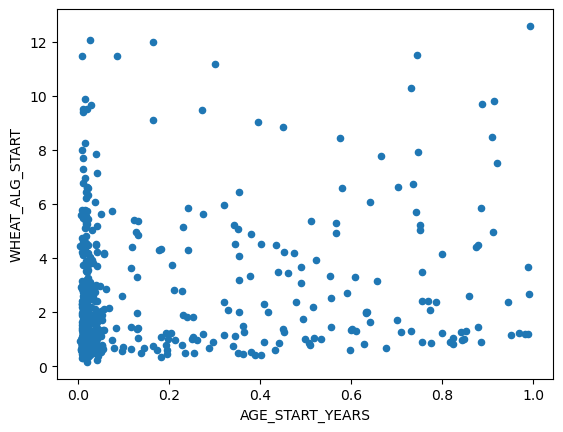

In [13]:
allergy_wheat_infant.plot(kind="scatter", x='AGE_START_YEARS', y='WHEAT_ALG_START')